In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                      'ml/machine-learning-databases/wine/wine.data',
                      header = None)

In [3]:
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)

In [6]:
from sklearn.ensemble import RandomForestClassifier

In [7]:
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)

forest.fit(X_train, y_train)
importances = forest.feature_importances_ #중요도 계산 -> 반환

indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
  print("%2d) %-*s %f" % (f + 1, 30,
                          feat_labels[indices[f]],
                          importances[indices[f]]))

 1) 13                             0.185453
 2) 7                              0.174751
 3) 10                             0.143920
 4) 12                             0.136162
 5) 1                              0.118529
 6) 11                             0.058739
 7) 6                              0.050872
 8) 5                              0.031357
 9) 2                              0.025648
10) 9                              0.025570
11) 4                              0.022366
12) 8                              0.013354
13) 3                              0.013279


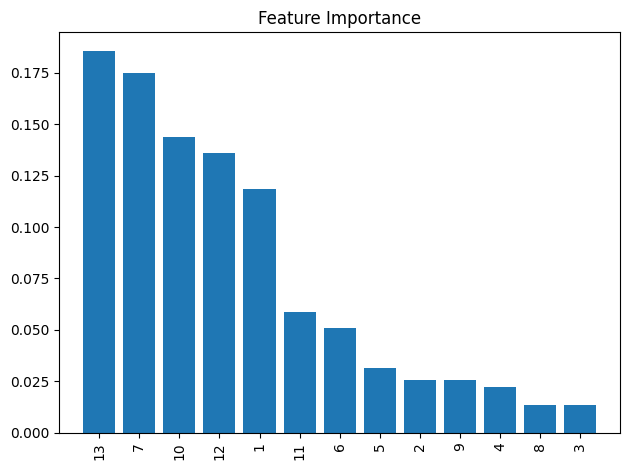

In [8]:
plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]),
        importances[indices],
        align='center')

plt.xticks(range(X_train.shape[1]),
           feat_labels[indices], rotation=90)

plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
# plt.savefig('images/04_09.png', dpi=300)
plt.show()